In [39]:
import pandas as pd
from utils import config

from sklearn.model_selection import train_test_split

# config.xls_path = '../Train-Data/Mix6_mainCat_20/pro_review.xlsx'
# config.xls_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_new/pro_review.xlsx'
total_df = pd.read_excel(config.xls_path)
# total_df = total_df[total_df['review_len']>=50]
# total_df = total_df[total_df['summary_len']>=5]
total_df = total_df.sort_values(by=['review_len','overlap'], ascending = False)
train_df, val_df = train_test_split(total_df, test_size=0.1, 
                                    random_state=0, shuffle=True)

print(len(total_df))
print(len(train_df))
print(len(val_df))

# train : 504075(90%),    test : 56009(10%) -> best 566084

560084
504075
56009


In [40]:
def longest_common_subsequence(main_string, comparing_string):

#     main_string = main_string.split(" ")
#     comparing_string = comparing_string.split(" ")
    columns_length = len(main_string)  # Get the length of the first word or base word
    rows_length = len(comparing_string)  # Get the length of the second word or comparing word

    # MAKE A 2D LIST (MATRIX)
    dynamic_table = [[0] * (columns_length + 1) for i in range(rows_length + 1)]

    # rows_length = NUMBER OF ROWS
    # columns_length = NUMBER OF COLUMNS
    
    # FILL THE MATRIX FOLLOWING LCS ALGORITHM.
    for i in range(1, rows_length + 1):
        for j in range(1, columns_length + 1):
            if main_string[j - 1] == comparing_string[i - 1]:
                dynamic_table[i][j] = 1 + dynamic_table[i - 1][j - 1]

            else:
                dynamic_table[i][j] = max(dynamic_table[i - 1][j], dynamic_table[i][j - 1])

#     print("MATRIX ACCORDING TO LONGEST COMMON SUBSEQUENCE ALGORITHM: \n ")

    # for i in range(rows_length + 1):
    #     print(dynamic_table[i])

    #print("LENGTH OF LONGEST COMMON SUBSEQUENCE = ", dynamic_table[rows_length][columns_length])

    len_lcs = dynamic_table[rows_length][columns_length]

    i = len(comparing_string)
    j = len(main_string)

    lcs_string = str()

    # BACKTRACKING TO FIND THE LONGEST COMMON SUBSEQUENCE

    temp = True

    while temp is True:
        if dynamic_table[i][j] == 0:
            temp = False
        elif dynamic_table[i][j] == dynamic_table[i][j - 1]:
            j = j - 1

        else:
            lcs_string = main_string[j-1] + " " + lcs_string
            i = i - 1
            j = j - 1

    return lcs_string, len_lcs

In [41]:
# df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

In [42]:
#%%
from tqdm import tqdm
from copy import deepcopy
def analay(df, mode):
#     df['token_lcs'] = 0
#     df['len_lcs'] = 0
#     df['percent_lcs'] = 0
#     df['overlap_pos'] = 0

#     df['reveiw_len'] = 0
#     df['summary_len'] = 0
#     df = df[:100]
    with tqdm(total=len(df)) as pbar:
        for i ,row in df.iterrows():       
            overlap_pos = None

#             rev, summary = row['review'], row['summary']
#             rev_tokens, summary_tokens = rev.split(" "), summary.split(" ")           
#             token_lcs, len_lcs = longest_common_subsequence(rev_tokens, summary_tokens)
#             percent_lcs = len_lcs / len(summary_tokens) * 100 # percent

#             rev_sents = rev.split(" . ")
#             overlap_sents = {idx: longest_common_subsequence(sent.split(" "), summary_tokens) for idx, sent in enumerate(rev_sents)}
#             sort_overlap_sent = {k:v for k,v in sorted(overlap_sents.items(), key= lambda item: item[1], reverse=True)}
#             overlap_sent_id = list(sort_overlap_sent.items())[0][0]

#             if (overlap_sent_id == 0) and (percent_lcs >= 20): overlap_pos = 0 # overlap_Top 
#             elif (overlap_sent_id == len(rev_tokens)-1) and (percent_lcs >= 20): overlap_pos = 1 # overlap_Final 
#             elif (percent_lcs >= 20): overlap_pos = 2 # overlap_other 
#             else: overlap_pos = -1 # no overlap 

#             df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

            pbar.update(1)
#             pbar.set_description("%s row: %s | overlap_pos: %s (%2.2f)percent| len_lcs: %s" % (mode, i, overlap_pos, percent_lcs, len_lcs))
#     df = df[df['token_lcs']!=0]
    return df



In [43]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,review,summary,cheat,cheat_num,review_len,summary_len,POS_keys,DEP_keys,...,overlap,binaryrating,vote,token_lcs,len_lcs,percent_lcs,overlap_pos,summary_polarity,summary_subjectivity,reveiw_len
90153,90153,90153,best advanced amateur please discount this rev...,<s> excellent camera that need bright lens to ...,"{'camera', 'bright', 'excellent', 'lens'}",2,619,11,"['advanced', 'discount', 'review', 'amateur', ...","['advanced', 'discount', 'review', 'amateur', ...",...,7,NaN,NaN,camera lens lens really,4,36.363636,2,0.633333,0.666667,619
403514,403514,403514,great screen protector . have have this phone ...,<s> great screen protector for phone get the j...,"{'phone', 'screen', 'protector', 'great'}",1,40,11,"['protector', 'great', 'screen', '', 'fit', 'p...","['protector', 'great', 'week', 'have', 'phone'...",...,6,NaN,NaN,great screen protector phone the the,6,54.545455,2,0.800000,0.750000,40
299132,299132,299132,best tire bang for the buck for sure . zero co...,<s> best tire bang for the buck for sure </s>,"{'buck', 'bang', 'tire', 'best'}",1,43,10,"['', '', 'noticeable', 'difference', 'perfect'...","['tire', 'noticeable', 'difference', 'front', ...",...,7,NaN,NaN,best tire bang for the buck for sure,8,80.000000,2,0.750000,0.594444,43
277298,277298,277298,been have some issue turn and not turn off wit...,<s> love the battery indicator and the ability...,"{'love', 'ability', 'pop', 'indicator', 'batte...",0,40,12,"['switch', 'main', '', 'battery', 'love', '']","['switch', 'main', 'turn', 'issue', 'act', 'se...",...,7,NaN,NaN,the and the indicator and the ability pop,8,66.666667,2,0.500000,0.600000,40
492671,492671,492671,have give dog these dental treat before and th...,<s> package was not receive and both up and am...,"{'package', 'amazon', 'receive'}",0,135,17,"['dental', 'treat', 'large', 'good', 'quantity...","['dental', 'treat', 'give', 'large', 'find', '...",...,11,NaN,NaN,and amazon and and amazon was say say the,9,52.941176,2,0.125000,0.375000,135


In [44]:
val_df.head()

,Unnamed: 0,Unnamed: 0.1,review,summary,cheat,cheat_num,review_len,summary_len,POS_keys,DEP_keys,...,overlap,binaryrating,vote,token_lcs,len_lcs,percent_lcs,overlap_pos,summary_polarity,summary_subjectivity,reveiw_len
21412,21412,21412,great camera for the for novice user like me ....,<s> great camera for the price star </s>,"{'camera', 'price', 'great'}",1,235,8,"['camera', 'great', 'digital', 'camera', '', '...","['camera', 'great', 'first', 'digital', 'camer...",...,5,NaN,NaN,great camera for the price,5,62.500000,2,0.800,0.75,235
124072,124072,124072,bit small . have squint lot see happen the scr...,<s> while always strive to be better than aver...,"{'average', 'strive', 'better'}",1,84,10,"['', 'happen', 'screen', 'find', 'tv', 'invite...","['squint', 'happen', 'lot', 'see', 'screen', '...",...,6,NaN,NaN,while always strive better than average,6,60.000000,2,0.175,0.45,84
350410,350410,350410,purchase this phone last july 2011 and the pow...,<s> warranty no warranty in amazon com llc </s>,"{'llc', 'amazon', 'warranty'}",0,514,9,"['purchase', 'phone', 'instruction', 'follow',...","['button', 'power', 'phone', 'purchase', 'july...",...,3,NaN,NaN,amazon amazon llc,3,33.333333,2,0.000,0.00,514
240350,240350,240350,have two these scooter there major problem wit...,<s> currie zip scooter chain fall off every ri...,"{'fall', 'ride', 'chain', 'scooter', 'currie'}",1,50,10,"['problem', 'major', 'occur', 'scooter', '', '...","['problem', 'major', 'scooter', 'fall', 'have'...",...,7,NaN,NaN,scooter chain fall off every ride,6,60.000000,2,0.000,0.00,50
478832,478832,478832,really like this stroller for get puppy out an...,<s> really like this stroller for get my puppy...,"{'stroller', 'puppy', 'like'}",1,80,13,"['see', 'world', 'puppy', 'old', '', '', 'walk...","['risk', 'world', 'other', 'puppy', 'parvo', '...",...,10,NaN,NaN,really like this stroller for get puppy out an...,10,76.923077,2,0.200,0.20,80


In [45]:
import os
import matplotlib.pyplot as plt

if os.path.exists('Analay/train_df.xlsx'):
    print('True')
    p_train_df = pd.read_excel('Analay/train_df.xlsx')
    p_val_df = pd.read_excel('Analay/val_df.xlsx')
else:    
    p_train_df = analay(deepcopy(train_df), 'train')
    p_train_df.to_excel('Analay/train_df.xlsx', encoding='utf8')

    p_val_df = analay(deepcopy(val_df), 'test')
    p_val_df.to_excel('Analay/val_df.xlsx', encoding='utf8')

100%|██████████| 56009/56009 [00:02<00:00, 21420.98it/s]


In [46]:
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)

# p_train_df.describe()

count    504075.000000
mean        133.084476
std         131.237904
min          20.000000
25%          51.000000
50%          89.000000
75%         163.000000
max        1000.000000
Name: reveiw_len, dtype: float64
reveiw_len < 30 : 37857
reveiw_len > 500 : 14196


Text(0.5, 1.0, 'reveiw_len')

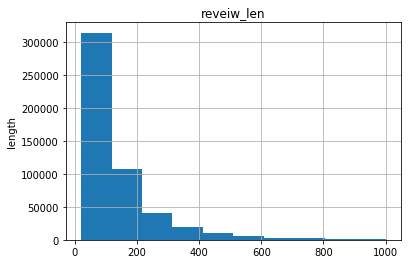

In [47]:

hist = p_train_df['reveiw_len'].hist(bins=10)
s = p_train_df['reveiw_len'].describe(); print(s)
print('reveiw_len < 30 :',len(p_train_df[p_train_df['reveiw_len']<30]))
print('reveiw_len > 500 :',len(p_train_df[p_train_df['reveiw_len']>=500])) # # max pos, max_enc_steps 
plt.ylabel('length')
plt.title('reveiw_len')

summary_len > 30 : 160
summary_len <= 5 : 22
count    504075.000000
mean         12.507050
std           3.673311
min           5.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          61.000000
Name: summary_len, dtype: float64


Text(0.5, 1.0, 'summary_len')

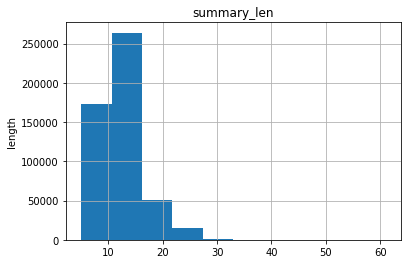

In [48]:
print('summary_len > 30 :',len(p_train_df[p_train_df['summary_len']>30]))  # max_dec_steps
print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps
hist = p_train_df['summary_len'].hist(bins=10)
s = p_train_df['summary_len'].describe(); print(s)
plt.ylabel('length')
plt.title('summary_len')

# Rating

In [49]:
# hist = p_train_df['rating'].hist(bins=5)
# # s = p_train_df['vote'].describe(); print(s)
# plt.ylabel('count')
# plt.title('Rating')

# sentiment

summary_polarity and summary_subjectivity  > 0 : 372734
count    504075.000000
mean          0.537656
std           0.286407
min           0.000000
25%           0.375000
50%           0.585374
75%           0.750000
max           1.000000
Name: summary_subjectivity, dtype: float64


Text(0.5, 1.0, 'summary_subjectivity')

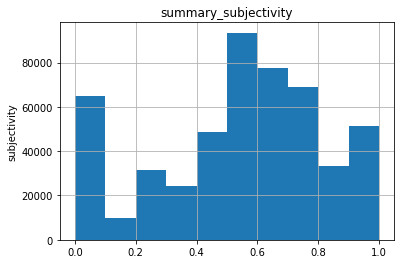

In [50]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_subjectivity'].hist(bins=10)
s = p_train_df['summary_subjectivity'].describe(); print(s)
plt.ylabel('subjectivity')
plt.title('summary_subjectivity')

summary_polarity and summary_subjectivity  > 0 : 372734
count    504075.000000
mean          0.372711
std           0.288491
min           0.000000
25%           0.125000
50%           0.350000
75%           0.566667
max           1.000000
Name: summary_polarity, dtype: float64


Text(0.5, 1.0, 'summary_polarity')

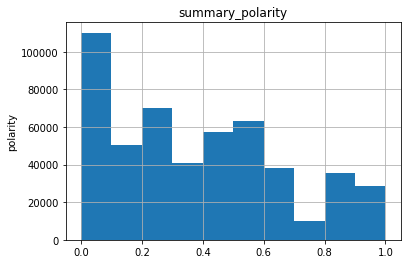

In [51]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_polarity'].hist(bins=10)
s = p_train_df['summary_polarity'].describe(); print(s)
plt.ylabel('polarity')
plt.title('summary_polarity')

# POS_Keyword

In [52]:
p_train_df['len_Pos_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Pos_keys'] = p_train_df['POS_keys'].apply(f)
p_train_df[['POS_keys','len_Pos_keys']].head()
p_train_df[['POS_keys','len_Pos_keys']].describe()

,len_Pos_keys
count,504075.000000
mean,28.674392
std,27.971112
min,1.000000
25%,11.000000
50%,19.000000
75%,35.000000
max,317.000000


In [53]:
print(len(p_train_df[p_train_df['len_Pos_keys']<=5]))

20315


# DEP_Keyword

In [54]:
p_train_df['len_DEP_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_DEP_keys'] = p_train_df['DEP_keys'].apply(f)
p_train_df[['DEP_keys','len_DEP_keys']].head()
p_train_df[['DEP_keys','len_DEP_keys']].describe()

,len_DEP_keys
count,504075.000000
mean,46.994158
std,48.281941
min,0.000000
25%,17.000000
50%,31.000000
75%,58.000000
max,475.000000


In [55]:
print(len(p_train_df[p_train_df['len_DEP_keys']<=5]))

6860


# TextRank_Keyword

In [56]:
p_train_df['len_TextRank_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_TextRank_keys'] = p_train_df['TextRank_keys'].apply(f)
p_train_df[['TextRank_keys','len_TextRank_keys']].head()
p_train_df[['TextRank_keys','len_TextRank_keys']].describe()

KeyError: 'TextRank_keys'

In [ ]:
print(len(p_train_df[p_train_df['len_TextRank_keys']<=1]))

# Prune data length

In [ ]:
print('reveiw_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_train_df[
    (p_train_df['reveiw_len']<=500) & (p_train_df['summary_len']<=20) 
#     (abs(p_train_df['summary_polarity'])>0.1) &
#     (p_train_df['summary_subjectivity']>0.25) &
#     (p_train_df['len_TextRank_keys']>0) 
#     (p_train_df['len_DEP_keys']>5) & 
#     (p_train_df['len_Pos_keys']>5)
                                        ]))
print('reveiw_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_val_df[
    (p_val_df['reveiw_len']<=500) & (p_val_df['summary_len']<=20) 
#     (abs(p_val_df['summary_polarity'])>0.1) &
#     (p_val_df['summary_subjectivity']>0.25)    
                                        ]))

# # first_acc = 0.325
min_df = p_train_df[
    (p_train_df['reveiw_len']<=500) & (p_train_df['summary_len']<=20) 
#     (abs(p_train_df['summary_polarity'])>0.1) &
#     (p_train_df['summary_subjectivity']>0.25)    
                                        ]

# print('reveiw_len > 7000 :',len(p_train_df[p_train_df['reveiw_len']>=700])) # # max pos, max_enc_steps 
# s = p_train_df['reveiw_len'].describe(); print(s)
# s = s.drop(labels = ['count'])
# s.plot.bar()
# plt.ylabel('length')
# plt.title('reveiw_len')
# plt.show()

# percent_lcs EDA(20 divided)

In [ ]:
hist = min_df['percent_lcs'].hist(bins=5)
s = min_df['percent_lcs'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('percent(%)')
plt.title('percent_lcs')

In [ ]:
# 统计学上的四分为函数
# 原则上p是可以取0到1之间的任意值的。但是有一个四分位数是p分位数中较为有名的。

# 所谓四分位数；即把数值由小到大排列并分成四等份，处于三个分割点位置的数值就是四分位数。

# 第1四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
# 第2四分位数 (Q2)，又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字。
# 第3四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
# 第3四分位数与第1四分位数的差距又称四分位距（InterQuartile Range,IQR）

s = pd.Series({'x < 20':len(min_df[min_df['percent_lcs']<20])/len(min_df)*100, 
           '20 < x < 40':len(min_df[(min_df['percent_lcs']>20) & (min_df['percent_lcs']<40)])/len(min_df)*100, 
           '40 < x < 60':len(min_df[(min_df['percent_lcs']>40) & (min_df['percent_lcs']<60)])/len(min_df)*100, 
           '60 < x < 80':len(min_df[(min_df['percent_lcs']>60) & (min_df['percent_lcs']<80)])/len(min_df)*100, 
           'x > 80':len(min_df[min_df['percent_lcs']>80])/len(min_df)*100          
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('percent_lcs EDA(20% divided)')
plt.show()

In [ ]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'overlap Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'overlap Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'overlap Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

# Ext/Abs分界(50)

In [ ]:
print('percent_lcs x > 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100),'%')  # max_dec_steps
print('percent_lcs x <= 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%')  # max_dec_steps

s = pd.Series({'x > 50':len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100, 
           'x < 50':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('percent_lcs')
plt.show()

In [ ]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'overlap Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'overlap Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'overlap Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

In [ ]:
def view(df, condition, view_num=10):
    package_dict = []
    for i in range(view_num):
        d1 = dict(min_df[eval(condition)].iloc[i])
        d2 = {'review':d1['review'],
              'summary':d1['summary'],
              'summary_subjectivity':d1['summary_subjectivity'],
              'summary_polarity':d1['summary_polarity'],
#               'token_lcs':d1['token_lcs'],
#               'overlap':d1['overlap'],
#               'percent_lcs':d1['percent_lcs'],
              'keywords':d1['POS_keys']            
             }
        package_dict.append(d2)
    return package_dict
        
# view(min_df, "(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']<50)")
view(min_df, "(min_df['review_len']<=50) & (min_df['percent_lcs']<=40) & (min_df['summary_len']>=15) & (min_df['summary_subjectivity']>=0.1)")



In [ ]:
dict(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)].iloc[0:10])['summary']